In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set()

In [4]:
df=pd.read_csv("kc_house_data.csv")

In [5]:
df.shape

(21613, 21)

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
new_df=df[['price','bedrooms','bathrooms','sqft_living','floors','condition']]

In [9]:
new_df

,price,bedrooms,bathrooms,sqft_living,floors,condition
0,221900.0,3,1.00,1180,1.0,3
1,538000.0,3,2.25,2570,2.0,3
2,180000.0,2,1.00,770,1.0,3
3,604000.0,4,3.00,1960,1.0,5
4,510000.0,3,2.00,1680,1.0,3
...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,3
21609,400000.0,4,2.50,2310,2.0,3
21610,402101.0,2,0.75,1020,2.0,3
21611,400000.0,3,2.50,1600,2.0,3


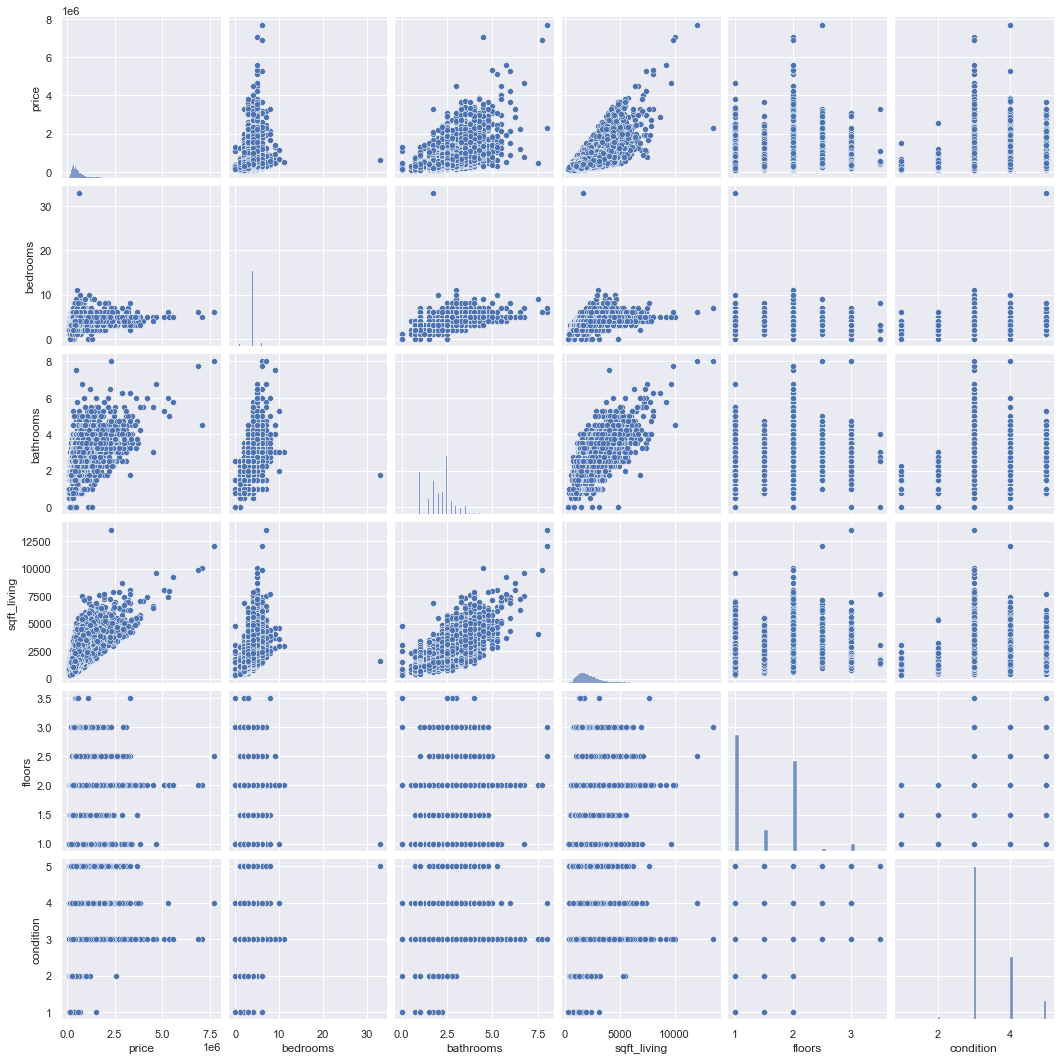

In [10]:
sns.pairplot(new_df)

<AxesSubplot:>

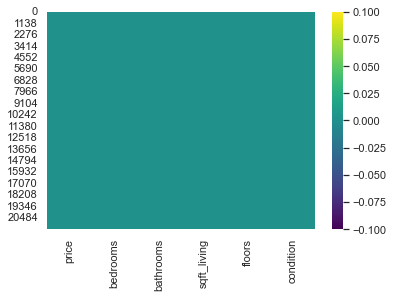

In [11]:
sns.heatmap(new_df.isnull(),cmap='viridis')

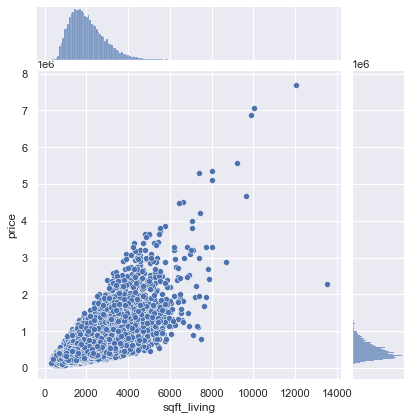

In [12]:
sns.jointplot(x='sqft_living',y='price',data=new_df)

In [13]:
new_df.corr()

,price,bedrooms,bathrooms,sqft_living,floors,condition
price,1.000000,0.308350,0.525138,0.702035,0.256794,0.036362
bedrooms,0.308350,1.000000,0.515884,0.576671,0.175429,0.028472
bathrooms,0.525138,0.515884,1.000000,0.754665,0.500653,-0.124982
sqft_living,0.702035,0.576671,0.754665,1.000000,0.353949,-0.058753
floors,0.256794,0.175429,0.500653,0.353949,1.000000,-0.263768
condition,0.036362,0.028472,-0.124982,-0.058753,-0.263768,1.000000


<AxesSubplot:>

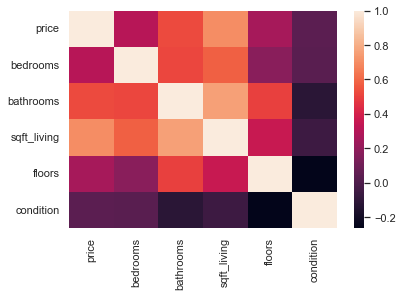

In [14]:
sns.heatmap(new_df.corr())

In [15]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [16]:
X=new_df[['sqft_living']]

In [17]:
y=new_df[['price']]

In [18]:
new_df[['price']].shape

(21613, 1)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=9)

In [20]:
lm=LinearRegression()

In [21]:
lm.fit(X_train,y_train)

LinearRegression()

In [22]:
prediction=lm.predict(X_test)

In [23]:
r2_score(y_test,prediction)

0.5004461687105555

In [24]:
scores=cross_val_score(lm,X,y,cv=20,scoring='r2')
scores

array([0.49229054, 0.47598654, 0.50226891, 0.50166905, 0.43294551,
       0.50589367, 0.52021976, 0.50419986, 0.47064258, 0.43006444,
       0.51272156, 0.4885247 , 0.48513252, 0.52018952, 0.46866506,
       0.50954898, 0.50654336, 0.48351776, 0.49640022, 0.47309719])

In [25]:
scores.mean()

0.48902608607887793

Text(0, 0.5, 'price')

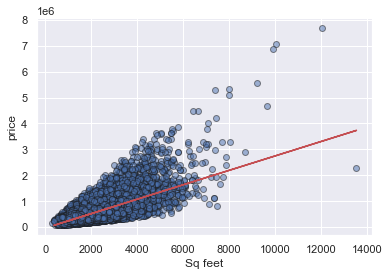

In [26]:
plt.scatter(X,y,alpha=0.5,edgecolor='k')
plt.plot(X_train,lm.predict(X_train),'r')
plt.xlabel('Sq feet')
plt.ylabel('price')

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [133]:
poly=PolynomialFeatures(degree=2)
trans_X=poly.fit_transform(X)
trans_X_train=poly.fit_transform(X_train)
trans_X_test=poly.fit_transform(X_test)
trans_y=poly.fit_transform(y)

In [134]:
trans_X[0]

array([1.0000e+00, 1.1800e+03, 1.3924e+06])

In [135]:
print(trans_X_train[0])

[1.000e+00 8.800e+02 7.744e+05]


In [136]:
lr=LinearRegression()

In [137]:
lr.fit(trans_X_train,y_train)

LinearRegression()

In [138]:
trans_prediction=lr.predict(trans_X_test)

In [139]:
r2_score(y_test,trans_prediction)

0.5559734750924783

In [140]:
scorespoly=cross_val_score(lr,trans_X,y,cv=20,scoring='r2')
scorespoly

array([0.51624471, 0.5575943 , 0.53158974, 0.59290967, 0.51133972,
       0.5493732 , 0.63422898, 0.57873934, 0.57668937, 0.46642326,
       0.51686133, 0.17598427, 0.49664691, 0.54818807, 0.49624772,
       0.5322681 , 0.54976608, 0.50357071, 0.54155727, 0.4956407 ])

In [141]:
scorespoly.mean()

0.5185931724641318

In [142]:
X_new=np.linspace(0,14000,21613).reshape(21613,1)
X_new.shape

(21613, 1)

In [143]:
X_new_poly=poly.transform(X_new)
y_new=lr.predict(X_new_poly)

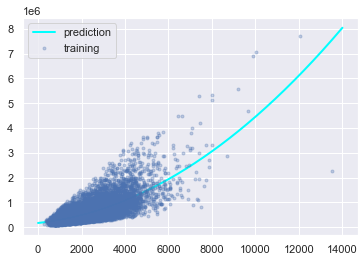

In [144]:
plt.plot(X_new,y_new,'cyan',label='prediction',linewidth=2)
plt.plot(X,y,'b.',label='training',alpha=.3)



plt.legend()